In [65]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Incarcare set de date
data=np.loadtxt("rezultate_fepe.csv", delimiter=",")
x=data[:, :2]  # sunt selectate toate liniile si numai primele doua coloane
y=data[:, 2]  # sunt selectate toate liniile si numai a treia coloana

In [67]:
# Normarea datelor
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# Splitarea datelor
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)  # 20% dintre date (0.2) merg in setul de test si restul raman pentru antrenare

# Salvare scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [68]:
""" --- Alegere model --- """
nr_model = 5  # numarul modelului folosit

# Definirea RETELEI NEURONALE
if nr_model == 1:  # al doilea cel mai bun
    model=keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1, activation="linear")  # 1 output neuron
    ])
if nr_model == 2:
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(1, activation="linear")  # 1 output neuron
    ])
if nr_model == 3:
    model = keras.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=(x.shape[1],)),
        keras.layers.Dense(1, activation="linear")  # 1 output neuron
    ])

if nr_model == 4:
    model = keras.Sequential([
        keras.layers.Dense(64, activation="swish", input_shape=(x.shape[1],)),
        keras.layers.Dense(32, activation="swish"),
        keras.layers.Dense(16, activation="swish"),
        keras.layers.Dense(8, activation="swish"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(1, activation="linear")  # 1 output neuron
    ])

if nr_model == 5:  # cel mai bun
    model = keras.Sequential([
    keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=(x.shape[1],)),
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(16, activation=keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(1, activation="linear")  # 1 output neuron
])

/home/tasepata/anaconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/tasepata/anaconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Compilarea modelului
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [70]:
# Antrenarea modelului
history=model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - loss: 0.0033 - mae: 0.0341 - val_loss: 8.9063e-04 - val_mae: 0.0195
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0037 - mae: 0.0282 - val_loss: 3.3109e-04 - val_mae: 0.0107
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4629e-04 - mae: 0.0119 - val_loss: 1.5775e-04 - val_mae: 0.0066
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4755e-04 - mae: 0.0089 - val_loss: 9.5472e-05 - val_mae: 0.0056
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3282e-04 - mae: 0.0079 - val_loss: 7.5093e-05 - val_mae: 0.0065
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8265e-04 - mae: 0.0071 - val_loss: 6.1623e-05 - val_mae: 0.0043
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9382e-04 - mae: 0.0063 - val_loss: 4.5191e-05 - val_mae: 0.0052
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7568e-04 - mae: 0.0059 - val_loss: 4.1899e-05 - val_mae: 0.0044
Epo

In [71]:
# Evaluarea modelului
loss, mae=model.evaluate(x_test, y_test)
print(f"Test MAE: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2415e-06 - mae: 0.0015
Test MAE: 0.0015523264883086085


In [72]:
nume_model = "Ge_FEPE_model.keras"

# Salvarea modelului in directory-ul curent
model.save(nume_model)

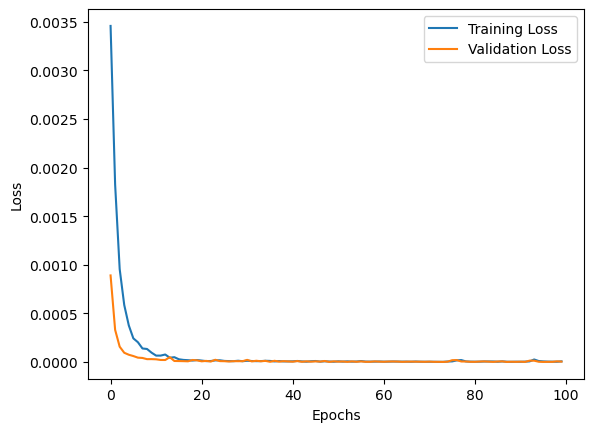

In [73]:
# Plotarea curbelor de invatare
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [74]:
# Date noi pentru a prezice rezultatul (distanta [cm], energia [keV])
new_data = np.array([[2, 1200]])
# Scalare date noi
new_data_scaled = scaler.transform(new_data)
# Predictie model
prediction = model.predict(new_data_scaled)
print("FEPE predicted:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
FEPE predicted: 0.018113337
